In [119]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm
#x is duration, y is wait
df = pd.DataFrame({""
    'x': [3.6,1.8,2.283,3.333,2.883,4.533,1.95,1.833,4.7,3.6,1.6,4.35,3.917,4.2,1.75,1.8,4.7,2.167,4.8,1.75],
    'y': [79,54,62,74,55,85,51,54,88,85,52,85,84,78,62,51,83,52,84,47]
})
X = df.as_matrix()

In [120]:
from numpy.linalg import inv, det
from numpy import *
tau = [0.25,0.75]
theta = []
mu1 = [2.5,65]
S1 = [[1,5],[5,100]]
mu2 = [3.5,70]
S2 = [[2,10],[10,200]]
theta1 = {}
theta2 = {}
theta1['mu'] = mu1
theta1['S'] = S1
theta2['mu'] = mu2
theta2['S'] = S2
theta.append(theta1)
theta.append(theta2)
print("theta :",theta)

theta : [{'mu': [2.5, 65], 'S': [[1, 5], [5, 100]]}, {'mu': [3.5, 70], 'S': [[2, 10], [10, 200]]}]


In [121]:
def f(X,thetaArg):
    S = thetaArg['S']
    mu = thetaArg['mu']
    X = array(X)
    left = 1/( 2 * pi * det(S)**0.5 )
    right = exp(-0.5 * np.dot(np.transpose(X-mu),inv(S)).dot(X-mu))
    f = left * right
    return f
print( f(X[0],theta[0]) )

0.00619949284268


In [122]:
p = np.empty(shape=[2,20], dtype = object) 
p[1,2] = 2
p[1,5] = 56
p
theta

[{'S': [[1, 5], [5, 100]], 'mu': [2.5, 65]},
 {'S': [[2, 10], [10, 200]], 'mu': [3.5, 70]}]

In [123]:
def expectation(tau,thetaArg):
    for j in range(len(thetaArg)):
        for i in range(len(X)):
            num = tau[j]*f(X[i],thetaArg[j])
            denom = (tau[0]*f(X[i],thetaArg[0]) + tau[1]*f(X[i],thetaArg[1]))
            p[j,i] = num/denom
    return p

In [124]:
expectation([0.6,0.4],theta)

array([[0.56347540236402549, 0.80037061052727543, 0.80738635346859122,
        0.66389847247984946, 0.65638281061435422, 0.26432986026209565,
        0.75512072232588878, 0.79819471727056412, 0.19133054549297421,
        0.44899774291699435, 0.79499133282400758, 0.30635387317938517,
        0.41700411341629545, 0.42766416635227805, 0.82936198749964929,
        0.77005331741918659, 0.24513662865802777, 0.74252156697541882,
        0.21225472245248195, 0.71220395844374029],
       [0.43652459763597445, 0.19962938947272449, 0.19261364653140875,
        0.33610152752015054, 0.34361718938564573, 0.7356701397379044,
        0.24487927767411127, 0.20180528272943593, 0.80866945450702588,
        0.55100225708300565, 0.20500866717599248, 0.69364612682061488,
        0.58299588658370449, 0.572335833647722, 0.17063801250035074,
        0.22994668258081336, 0.75486337134197223, 0.25747843302458112,
        0.78774527754751811, 0.28779604155625965]], dtype=object)

In [125]:
tau = [0.6,0.4]
def maximization(p):
    global tau
    mu = [empty,empty]
    theta = [empty,empty]
    S = [empty,empty]
    for j in range(0,2):
        tau[j] = 1/20 * p[j].sum()
        sum1 = 0
        sum2 = 0
        for i in range(0,20):
            sum1 += (p[j,i] * X[i])
        mu[j] = sum1 / p[j].sum()
        for i in range(0,20):
            sum2 += p[j,i] * array([(X[i] - mu[j])]) * array([(X[i] - mu[j])]).transpose()
        S[j] = sum2 / p[j].sum()
    newTheta1 = {}
    newTheta2 = {}
    newTheta1['mu'] = mu[0]
    newTheta1['S'] = S[0]
    newTheta2['mu'] = mu[1]
    newTheta2['S'] = S[1]
    theta[0] = newTheta1
    theta[1] = newTheta2
    print("Tau and theta after maximization")
    print("tau :", tau)
    print("theta :", theta)
    return tau, theta

In [126]:
for i in range(100):
    p = expectation(tau,theta)
    tau,theta = maximization(p)

Tau and theta after maximization
tau : [0.57035164524715432, 0.4296483547528458]
theta : [{'mu': array([  2.62689357,  63.01595366]), 'S': array([[   1.05482415,   12.73060165],
       [  12.73060165,  181.51832899]])}, {'mu': array([  3.6755568 ,  75.19811678]), 'S': array([[   1.21185404,   14.11084005],
       [  14.11084005,  189.20462815]])}]
Tau and theta after maximization
tau : [0.56698832069037453, 0.43301167930962542]
theta : [{'mu': array([  2.57349854,  62.37915562]), 'S': array([[   1.01142165,   12.50362237],
       [  12.50362237,  183.62624878]])}, {'mu': array([  3.73732733,  75.93732198]), 'S': array([[   1.12182248,   12.68024113],
       [  12.68024113,  166.14445741]])}]
Tau and theta after maximization
tau : [0.56758437496370229, 0.43241562503629788]
theta : [{'mu': array([  2.50299374,  61.49036911]), 'S': array([[   0.90565768,   11.41780845],
       [  11.41780845,  174.04660047]])}, {'mu': array([  3.83147547,  77.12262313]), 'S': array([[   1.02813317,   11.2

tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau and theta after maximization
tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau and theta after maximization
tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau 

tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau and theta after maximization
tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau and theta after maximization
tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau 

Tau and theta after maximization
tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau and theta after maximization
tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1.26527997,  15.85030796]])}]
Tau and theta after maximization
tau : [0.50000020844820392, 0.49999979155179619]
theta : [{'mu': array([  1.98160168,  54.00001977]), 'S': array([[  0.12796941,   0.41133545],
       [  0.41133545,  20.40047833]])}, {'mu': array([  4.17329924,  82.49999211]), 'S': array([[  0.25380684,   1.26527997],
       [  1

In [127]:
df = pd.DataFrame(X)
color = []
for i in range(len(p[0])):
    if p[0][i] > p[1][i]:
        color.append('b')
    else:
        color.append('r')
df['color']=color

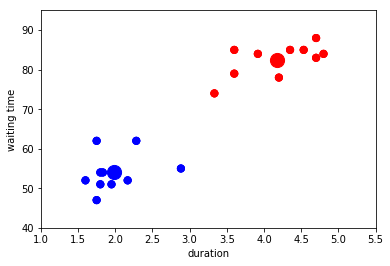

In [128]:
import matplotlib.pyplot as plt
import matplotlib
for point in df:
    plt.scatter(df[0],df[1],c=df['color'],s=50)
mu1 = theta[0]['mu']
mu2 = theta[1]['mu']
plt.scatter(mu1[0],mu1[1],c='b',s=200)
plt.scatter(mu2[0],mu2[1],c='r',s=200)
plt.xlim(1,5.5)
plt.ylim(40,95)
plt.xlabel("duration")
plt.ylabel("waiting time")
plt.show()


In [129]:
from numpy.linalg import inv, det
from numpy import *
tau = [0.25,0.75]
theta = []
mu1 = [2.5,65]
S1 = [[1,5],[5,100]]
mu2 = [3.5,70]
S2 = [[2,10],[10,200]]
mu3 = [3.0,67.5]
S3 = [[1.5,7.5],[7.5,150]]
theta1 = {}
theta2 = {}
theta3 = {}
theta1['mu'] = mu1
theta1['S'] = S1
theta2['mu'] = mu2
theta2['S'] = S2
theta3['mu'] = mu3
theta3['S'] = S3
theta.append(theta1)
theta.append(theta2)
theta.append(theta3)
theta

[{'S': [[1, 5], [5, 100]], 'mu': [2.5, 65]},
 {'S': [[2, 10], [10, 200]], 'mu': [3.5, 70]},
 {'S': [[1.5, 7.5], [7.5, 150]], 'mu': [3.0, 67.5]}]

In [130]:
p = np.empty(shape=[3,20], dtype = object) 
p[1,2] = 2
p[1,5] = 56
p

array([[None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None],
       [None, None, 2, None, None, 56, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None]], dtype=object)

In [131]:
expectation([0.25,0.25,0.5],theta)

array([[0.46252387758427288, 0.72773223921974717, 0.73646021016591867,
        0.56838152337034753, 0.56014507282771553, 0.19324688047910646,
        0.67274951471622924, 0.72503660839717265, 0.1362428356857367,
        0.35201673512465631, 0.72107773965548361, 0.22746408307239907,
        0.3228840708436661, 0.33251036723756661, 0.76416425283579181,
        0.69064729074864772, 0.17796645104661923, 0.65783270051495879,
        0.15227698467430298, 0.62261140897793299],
       [0.53747612241572718, 0.27226776078025289, 0.26353978983408133,
        0.43161847662965253, 0.43985492717228442, 0.80675311952089346,
        0.32725048528377082, 0.27496339160282729, 0.86375716431426319,
        0.64798326487534375, 0.27892226034451645, 0.77253591692760093,
        0.6771159291563339, 0.66748963276243334, 0.23583574716420824,
        0.30935270925135233, 0.82203354895338065, 0.34216729948504121,
        0.84772301532569705, 0.37738859102206695],
       [1.1760725407135637, 0.86923650833177113, 

In [132]:
def expectation(tau,thetaArg):
    for j in range(len(thetaArg)):
        for i in range(len(X)):
            num = tau[j]*f(X[i],thetaArg[j])
            denom = (tau[0]*f(X[i],thetaArg[0]) + tau[1]*f(X[i],thetaArg[1]) + tau[2]*f(X[i],thetaArg[2]))
            p[j,i] = num/denom
    return p

In [133]:
def maximization(p):
    global tau
    mu = [empty,empty,empty]
    theta = [empty,empty,empty]
    S = [empty,empty,empty]
    for j in range(0,3):
        tau[j] = 1/20 * p[j].sum()
        sum1 = 0
        sum2 = 0
        for i in range(0,20):
            sum1 += (p[j,i] * X[i])
        mu[j] = sum1 / p[j].sum()
        for i in range(0,20):
            sum2 += p[j,i] * array([(X[i] - mu[j])]) * array([(X[i] - mu[j])]).transpose()
        S[j] = sum2 / p[j].sum()
    newTheta1 = {}
    newTheta2 = {}
    newTheta3 = {}
    newTheta1['mu'] = mu[0]
    newTheta1['S'] = S[0]
    newTheta2['mu'] = mu[1]
    newTheta2['S'] = S[1]
    newTheta3['mu'] = mu[2]
    newTheta3['S'] = S[2]
    theta[0] = newTheta1
    theta[1] = newTheta2
    theta[2] = newTheta3
    print("Tau and theta after maximization")
    print("tau :", tau)
    print("theta :", theta)
    return tau, theta

In [134]:
tau = [0.25,0.25,0.5]
for i in range(100):
    p = expectation(tau,theta)
    tau,theta = maximization(p)

Tau and theta after maximization
tau : [0.24719721873244432, 0.24482559773784696, 0.50797718352970878]
theta : [{'mu': array([  2.50168498,  61.6128353 ]), 'S': array([[   0.94166564,   11.25105201],
       [  11.25105201,  161.82632212]])}, {'mu': array([  3.52829092,  73.45272201]), 'S': array([[   1.32698064,   15.52839783],
       [  15.52839783,  206.94678787]])}, {'mu': array([  3.14034675,  68.97233388]), 'S': array([[   1.37879674,   16.39673399],
       [  16.39673399,  221.93325405]])}]
Tau and theta after maximization
tau : [0.24894041751965559, 0.24612896670807671, 0.50493061577226772]
theta : [{'mu': array([  2.41389092,  60.5145957 ]), 'S': array([[   0.83697158,   10.36395451],
       [  10.36395451,  156.88766212]])}, {'mu': array([  3.57115219,  73.96482413]), 'S': array([[   1.27349345,   14.62609903],
       [  14.62609903,  191.74447157]])}, {'mu': array([  3.16394161,  69.27800465]), 'S': array([[   1.3795809 ,   16.35295812],
       [  16.35295812,  220.76349364]]

theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximization
tau : [0.45000001815967572, 0.4002081259584796, 0.14979185588184471]
theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximization
tau : [0.45000001815967572, 0.40020812595848004, 0.1497918558818442

tau : [0.45000001815967572, 0.4002081259584796, 0.14979185588184471]
theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximization
tau : [0.45000001815967572, 0.40020812595848004, 0.14979185588184427]
theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximizati

tau : [0.45000001815967572, 0.40020812595848021, 0.14979185588184415]
theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximization
tau : [0.45000001815967572, 0.4002081259584796, 0.14979185588184471]
theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximizati

tau : [0.45000001815967572, 0.40020812595848021, 0.14979185588184415]
theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximization
tau : [0.45000001815967572, 0.4002081259584796, 0.14979185588184471]
theta : [{'mu': array([  1.88144448,  53.88888893]), 'S': array([[  0.04187429,   0.34571608],
       [  0.34571608,  22.54320902]])}, {'mu': array([  4.34956889,  83.2492176 ]), 'S': array([[ 0.1569682 ,  0.73595903],
       [ 0.73595903,  9.44687769]])}, {'mu': array([  3.27165407,  71.31886827]), 'S': array([[  8.75567217e-02,   3.66696963e+00],
       [  3.66696963e+00,   1.53583030e+02]])}]
Tau and theta after maximizati

In [135]:
theta

[{'S': array([[  0.04187429,   0.34571608],
         [  0.34571608,  22.54320902]]),
  'mu': array([  1.88144448,  53.88888893])},
 {'S': array([[ 0.1569682 ,  0.73595903],
         [ 0.73595903,  9.44687769]]),
  'mu': array([  4.34956889,  83.2492176 ])},
 {'S': array([[  8.75567217e-02,   3.66696963e+00],
         [  3.66696963e+00,   1.53583030e+02]]),
  'mu': array([  3.27165407,  71.31886827])}]

In [136]:
df = pd.DataFrame(X)
color = []
array = []
for i in range(len(p[0])):
    arr = np.array([p[0][i],p[1][i],p[2][i]])
    maxIndex = np.argmax(arr)
    array.append(maxIndex)
for i in range(len(p[0])):
    if array[i] == 1:
        color.append('y')
    elif array[i] == 2:
        color.append('b')
    else: 
        color.append('r')
df['color'] = color
df

,0,1,color
0,3.600,79.0,y
1,1.800,54.0,r
2,2.283,62.0,r
3,3.333,74.0,b
4,2.883,55.0,b
5,4.533,85.0,y
6,1.950,51.0,r
7,1.833,54.0,r
8,4.700,88.0,y
9,3.600,85.0,b


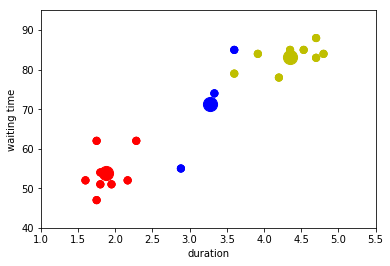

In [137]:
import matplotlib.pyplot as plt
import matplotlib
for point in df:
    plt.scatter(df[0],df[1],c=df['color'],s=50)
mu1 = theta[0]['mu']
mu2 = theta[1]['mu']
mu3 = theta[2]['mu']
plt.scatter(mu1[0],mu1[1],c='r',s=200)
plt.scatter(mu2[0],mu2[1],c='y',s=200)
plt.scatter(mu3[0],mu3[1],c='b',s=200)
plt.xlim(1,5.5)
plt.ylim(40,95)
plt.xlabel("duration")
plt.ylabel("waiting time")
plt.show()